<a href="https://colab.research.google.com/github/pranaysriharsha/Mood_Monitor/blob/main/Another_copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

Let us implement the Linear Regression from scratch. You may run the cells to visualize the results for yourself.

We begin with importing the necessary packages.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import math
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-31-b752571c79c5>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Regression from Scratch**

Let us generate our data randomly. We generate x-values using random number generator and obtain y-values using equation y = 2x - 5 + c. Let us also visualise the created data using a scatter plot.

complete the code:

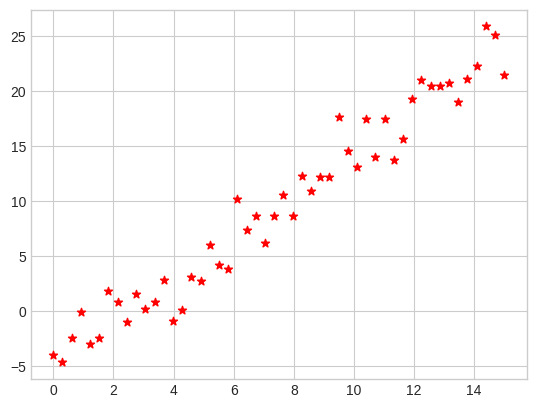

In [ ]:
rng = np.random.seed(42)  # fixing the random number generator seed to reproduce the resuts
x =np.linspace(0,15,50) # generate some rqndom numbers using rng
y =2*x-5+np.random.normal(0,2,len(x)) # create some linear relationship with some randm noise using the equation provided
#print(x)
#print(y)
# create a scatter plot
plt.scatter(x,y,color='red',marker='*')
plt.show()

In [ ]:
x_train, y_train = x , y  # preparing data for training a model.

Let us find the data type of x_train variable.

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [0.         0.30612245 0.6122449  0.91836735 1.2244898 ]


In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [-4.00657169 -4.6642837  -2.48013313 -0.11720559 -3.01932716]


Lets us find out the shape of our x and y arrays

In [ ]:
x_train_shape =x_train.shape # shape of x_train
y_train_shape =y_train.shape # shape of y_train
print ('The shape of x_train is:', x_train_shape)
print ('The shape of y_train is: ', y_train_shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (50,)
The shape of y_train is:  (50,)
Number of training examples (m): 50


**Computing the Cost Function**

Let us define the cost function to calculate the cost of a predicted output Ypred using the equation y = w*x + b, where (w,b) are variables and x is input.

The cost is calculated as : 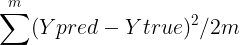

In [ ]:
def compute_cost(x, y, w, b):
    m = x.shape[0]                        # number of training examples
    total_cost = 0
    cost=0
    for i in range(m):                    # iteratively calculating the cost for all saz
        f_wb =w*x[i]+b                           # calculate y value
        cost +=  ((f_wb-y[i])**2)                         # calculate loss

    total_cost = cost/(2*m)               # take final loss to be average of loss of every sample point


    return total_cost

Let us check out the cost function in action

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost =compute_cost(x,y,initial_w,initial_b) # use the above function to compute the cose with these initial w and b
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w (zeros): 22.516


**Computing the Gradient**

Let us write a function to compute the gradient (slope) of our cost function along our variables. You must have come across the following equations while looking up the theory of linear regression. Here the red box is the gradients we are calculating now.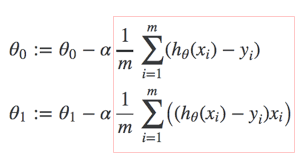

In [ ]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i]+b
        dj_db +=f_wb-y[i]  # write these using above function(the red box)
        dj_dw += (f_wb-y[i])*x[i] # same here
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

Let us check out our gradient function in action

In [ ]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db =compute_gradient(x,y,initial_w,initial_b) # use the compute_gradient function to calculate temporary gradients
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -109.13975194458499 -9.54905218948772


**Applying Gradient Descent Algorithm from scratch**

Coming to the final part of integrating every part of code we have created, Let us implement the gradient descent algorithm

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(x)                                                             # number of training examples
    J_history = []                                                         # An array to store cost J and w's at each iteration — primarily for graphing later
    w_history = []
    w = copy.deepcopy(w_in)                                                # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = gradient_function(x, y, w, b)                       # Compute gradients

        w = w-alpha*dj_dw                                              # Move along the found gradient direction scaled by alpha / changing the values of w and b based on gradients
        b =b-alpha*dj_db

        cost =cost_function(x,y,w,b)                                           # Now find the new cost using the modified variables w, b using function defined before
        J_history.append(cost)

                                                                           # Print cost after every 10 iterations
        if i%10==0:                                                        #i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Let us see our implementation in ACTION

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     9.20   
Iteration   10: Cost     4.71   
Iteration   20: Cost     4.56   
Iteration   30: Cost     4.41   
Iteration   40: Cost     4.27   
Iteration   50: Cost     4.14   
Iteration   60: Cost     4.02   
Iteration   70: Cost     3.90   
Iteration   80: Cost     3.79   
Iteration   90: Cost     3.68   
Iteration  100: Cost     3.58   
Iteration  110: Cost     3.49   
Iteration  120: Cost     3.39   
Iteration  130: Cost     3.31   
Iteration  140: Cost     3.23   
Iteration  150: Cost     3.15   
Iteration  160: Cost     3.07   
Iteration  170: Cost     3.00   
Iteration  180: Cost     2.93   
Iteration  190: Cost     2.87   
Iteration  200: Cost     2.81   
Iteration  210: Cost     2.75   
Iteration  220: Cost     2.70   
Iteration  230: Cost     2.64   
Iteration  240: Cost     2.60   
Iteration  250: Cost     2.55   
Iteration  260: Cost     2.50   
Iteration  270: Cost     2.46   
Iteration  280: Cost     2.42   
Iteration  290: Cost     2.38   
Iteration 

Let us see what our regressed equation predicts for every x

In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Visualizing our predictions(points on the straight line) against the actual y values. We see how our algorithm found a good fitting line through our data samples.

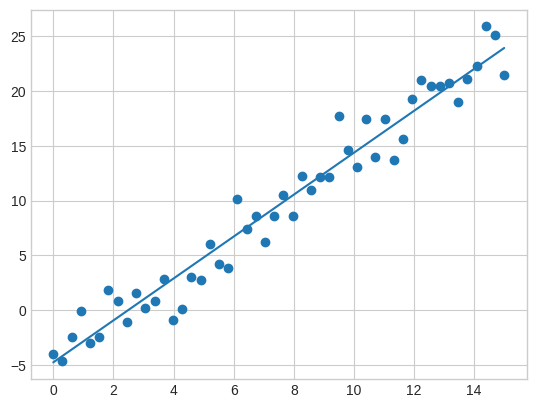

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted)
plt.scatter(x_train, y_train)
# Set the title
# Set the y-axis label
# Set the x-axis label
plt.show()

**Linear Regression Using Scikit-Learn**


We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, incorporating our previous implementation all in a few lines of code.

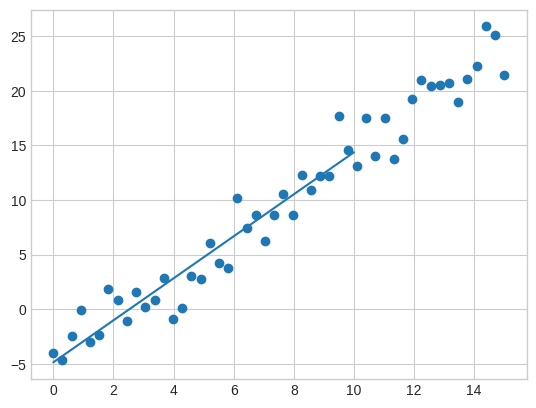

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)                 # This fits the line to the same data we used earlier

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])      # This is used to get the predictions

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9226888006775704
Model intercept: -4.871113815594061


We see that the results are very close to the values used to generate the data, as we might hope.

**Optional-Material**

Linear Regression in MultiDimension

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.